In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
df = pd.read_csv('review_total_all.2.0.0.csv', encoding = 'cp949')

In [15]:
df.head()

,title,text,id,date,like,rate,place,season,cast,show,genre
0,쌀르페우스 최고,정말 최고에요\n노래도 최고 연기도 최고\n꼭보세요 두번보세요,ysmell***,2021-11-01,0,5.0,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬
1,하데스타운,두번째 관람하니 더 감동이네요. 참 잘만들어진 극입니다.,17***,2021-11-01,0,5.0,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬
2,운명의 세 여신님들,극 중에선 너무 얄미우신데 캐릭터를 넘 잘 살리셔서 매력적이에요~,skygirl***,2021-11-01,0,5.0,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬
3,재밌었어요.,재르메스 멋있고 조형균배우 음색 너무예뻐요~~수하배우님도 예뻤답니다.,sbr,2021-11-01,0,4.0,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬
4,재미있어요~,넘버가 너무너무 좋아요 재미있어요,mbw***,2021-11-01,0,5.0,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154097 entries, 0 to 154096
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   title   154097 non-null  object 
 1   text    154097 non-null  object 
 2   id      154097 non-null  object 
 3   date    154097 non-null  object 
 4   like    154097 non-null  int64  
 5   rate    154097 non-null  float64
 6   place   154097 non-null  object 
 7   season  154097 non-null  object 
 8   cast    154097 non-null  object 
 9   show    154097 non-null  object 
 10  genre   154097 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 12.9+ MB


### 맞춤법 교정 및 띄어쓰기

In [ ]:
#soynlp 자주 사용
# https://pypi.org/project/soynlp/
! pip install soynlp  

#py-hanspell
! pip install git+https://github.com/ssut/py-hanspell.git 

In [5]:
from soynlp.normalizer import repeat_normalize
from soynlp.normalizer import only_hangle_number
from hanspell import spell_checker  #부산대 맞춤법 교정기

def ko_text_clean(text):  #text를 전처리해주는 함수 정의
    
    text = only_hangle_number(text)  #특수문자나 숫자 모두 제거하고 한글만 남기기
    text = re.sub('([ㄱ-ㅎㅏ-ㅣ]+)', '', text) #자음모음 삭제
    text = repeat_normalize(text, num_repeats=2)  #2번이상 반복적으로 쓴 단어 제거하기
    spell = spell_checker.check(text)  #맞춤법 교정(완벽하지는 않지만 띄어쓰기도 교정 가능)
    text = spell.checked
    text = re.sub('\s+', ' ', text) # 중복 띄어쓰기 삭제

    return text.strip() #앞뒤공백제거

In [46]:
df.text.iloc[0]

'정말 최고에요\n노래도 최고 연기도 최고\n꼭보세요 두번보세요'

In [47]:
ko_text_clean(df.text.iloc[0])

'정말 최고예요 노래도 최고 연기도 최고 꼭 보세요 두 번 보세요'

In [48]:
#모든 text 합치기
df['body'] = df['title'].str.cat(df['text'],sep=" ")

In [ ]:
body = []
for i in range(len(df)):
    try:
        b = ko_text_clean(df.body.iloc[i])
    except:
        b = 1
    body.append(b)

In [467]:
#후기 길이 열 추가한 파일
df = pd.read_csv('review_total_all.2.0.4.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154097 entries, 0 to 154096
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Column1  154097 non-null  int64 
 1   title    154097 non-null  object
 2   text     154097 non-null  object
 3   id       154097 non-null  object
 4   date     154097 non-null  object
 5   like     154097 non-null  int64 
 6   rate     154097 non-null  int64 
 7   place    154097 non-null  object
 8   season   154097 non-null  object
 9   cast     154097 non-null  object
 10  show     154097 non-null  object
 11  genre    154097 non-null  object
 12  body     154097 non-null  object
 13  열1       154097 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 16.5+ MB


In [468]:
df.rename(columns={'열1':'leng'}, inplace=True)
df.drop('Column1', axis=1, inplace=True)

In [469]:
df['body'] = body
df.body.fillna('[]', inplace=True)

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154097 entries, 0 to 154096
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   154097 non-null  object
 1   text    154097 non-null  object
 2   id      154097 non-null  object
 3   date    154097 non-null  object
 4   like    154097 non-null  int64 
 5   rate    154097 non-null  int64 
 6   place   154097 non-null  object
 7   season  154097 non-null  object
 8   cast    154097 non-null  object
 9   show    154097 non-null  object
 10  genre   154097 non-null  object
 11  body    154097 non-null  object
 12  leng    154097 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 15.3+ MB


#### 후기 조작 판별 여부 열 rig 추가

In [471]:
y = df.duplicated(['show', 'id', 'body'], keep=False).to_list()

In [472]:
df['rig'] = y

In [473]:
df.head(20)

,title,text,id,date,like,rate,place,season,cast,show,genre,body,leng,rig
0,쌀르페우스 최고,정말 최고에요\n노래도 최고 연기도 최고\n꼭보세요 두번보세요,ysmell***,2021-11-01,0,5,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,쌀 르페 우스 최고 정말 최고예요 노래도 최고 연기도 최고 꼭 보세요 두 번 보세요,41,False
1,하데스타운,두번째 관람하니 더 감동이네요. 참 잘만들어진 극입니다.,17***,2021-11-01,0,5,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,하데스 타운 두 번째 관람하니 더 감동이네요 참 잘 만들어진 극입니다,37,False
2,운명의 세 여신님들,극 중에선 너무 얄미우신데 캐릭터를 넘 잘 살리셔서 매력적이에요~,skygirl***,2021-11-01,0,5,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,운명의 세 여신님들 극 중에선 너무 얄미우신데 캐릭터를 너무 잘 살리셔서 매력적이에요,47,False
3,재밌었어요.,재르메스 멋있고 조형균배우 음색 너무예뻐요~~수하배우님도 예뻤답니다.,sbr,2021-11-01,0,4,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,재밌었어요 자르 메스 멋있고 조형균 배우 음색 너무 예뻐요 수하 배우님도 예뻤답니다,45,False
4,재미있어요~,넘버가 너무너무 좋아요 재미있어요,mbw***,2021-11-01,0,5,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,재미있어요 넘버가 너무너무 좋아요 재미있어요,25,False
5,조형균 배우님 목소리에 반했습니다,계속 시우민 배우님으로만 보다가 처음으로 조형균 배우님 보고왔어요! 유튜브에 공개된...,hjbb0***,2021-11-01,0,5,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,조형균 배우님 목소리에 반했습니다 계속 시우민 배우님으로만 보다가 처음으로 조형균 ...,186,False
6,잘 보고 왔습니다~,깡르페우스 보고왔어요~ 말해 뭐해! 역시나 기대 이상으로 오르페우스 역할에 찰떡이더...,hjbb0***,2021-11-01,1,5,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,잘 보고 왔습니다 깡르페우스 보고 왔어요 말해 뭐 해 역시나 기대 이상으로 오르페우...,81,False
7,배우들마다 연기가 조금씩 달라서 더 좋아요!,회전도는 중인데 배우들마다 디테일도 조금씩 다르고 연기의 노선이나 캐릭터 해석이 조...,hjbb0***,2021-11-01,0,5,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,배우들마다 연기가 조금씩 달라서 더 좋아요 회전 도는 중인데 배우들마다 디테일도 조...,131,False
8,최고의 뮤지컬,그리스 로마 신화를 이렇게 각색할수도 있구나 싶었다\n노래도 너무 좋고 배우들 연기...,swifty0,2021-11-01,0,5,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,최고의 뮤지컬 그리스 로마 신화를 이렇게 각색할 수도 있구나 싶었다 노래도 너무 좋...,58,False
9,뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN),뮤지컬〈하데스타운〉 최초 한국 공연 (MUSICAL HADESTOWN)\n추천합니다~~,yoone***,2021-11-01,0,4,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,뮤지컬 하데스 타운 최초 한국 공연 뮤지컬 하데스 타운 최초 한국 공연 추천합니다,87,False


In [476]:
#rig열 값 numeric으로
rig = df['rig'].map(lambda x : 1 if x else 0)
df['rig'] = rig

#### 라이브 후기 여부 열 live 추가 

In [474]:
live = df['body'].map(lambda x : 1 if x.find('라이브 후기')!=-1 else 0)
df['live'] = live

In [475]:
live.value_counts()

0    141486
1     12611
Name: body, dtype: int64

#### 후기 본문에서 '라이브 후기' 문자열 제거한 열 subLive 추가

In [477]:
subLive = df['body'].map(lambda x : re.sub('라이브 후기', '', x))

In [478]:
df['body'][100362]

'마지막까지 행복했어요 라이브 후기 블메포 덕에 행복했습니다 모두 고생 많으셨고 다음에 또 와주세요'

In [479]:
subLive[100362]

'마지막까지 행복했어요  블메포 덕에 행복했습니다 모두 고생 많으셨고 다음에 또 와주세요'

In [480]:
df['subLive'] = subLive

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154097 entries, 0 to 154096
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    154097 non-null  object
 1   text     154097 non-null  object
 2   id       154097 non-null  object
 3   date     154097 non-null  object
 4   like     154097 non-null  int64 
 5   rate     154097 non-null  int64 
 6   place    154097 non-null  object
 7   season   154097 non-null  object
 8   cast     154097 non-null  object
 9   show     154097 non-null  object
 10  genre    154097 non-null  object
 11  body     154097 non-null  object
 12  leng     154097 non-null  int64 
 13  rig      154097 non-null  int64 
 14  live     154097 non-null  int64 
 15  subLive  154097 non-null  object
dtypes: int64(5), object(11)
memory usage: 18.8+ MB


In [483]:
#'라이브 후기' 문자열을 제거하면서 빈 값이 된 행들
df[df['subLive']=='']

,title,text,id,date,like,rate,place,season,cast,show,genre,body,leng,rig,live,subLive
573,ㅇ,ㄴㄷㅈㅇ,ryu***,2021-10-12,0,5,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,,6,0,0,
5012,ㅇㅅㅇ,ㅇㅅㅇㅅㅇㅅㅇㅅㅇ,lee8***,2021-05-24,0,5,서경대학교 공연예술센터 스콘2관,2021.03.16 ~2021.05.23,"박영수,강찬,박은석,김도현,최현선,이지숙,임찬민,정다희",아이위시,뮤지컬,,13,1,0,
5014,ㅇㅅㅇ,ㅇㅅㅇㅅㅇㅅㅇㅅㅇ,lee8***,2021-05-24,0,5,서경대학교 공연예술센터 스콘2관,2021.03.16 ~2021.05.23,"박영수,강찬,박은석,김도현,최현선,이지숙,임찬민,정다희",아이위시,뮤지컬,,13,1,0,
5118,ㅇㅅㅇ,ㅇㅅㅇㅅㅇㅅㅇㅅㅇ,lee8***,2021-05-17,0,5,서경대학교 공연예술센터 스콘2관,2021.03.16 ~2021.05.23,"박영수,강찬,박은석,김도현,최현선,이지숙,임찬민,정다희",아이위시,뮤지컬,,13,1,0,
5301,ㅇㅅㅇ,ㅇㅅㅇㅅㅇㅅㅇㅅㅇ,lee8***,2021-05-03,0,5,서경대학교 공연예술센터 스콘2관,2021.03.16 ~2021.05.23,"박영수,강찬,박은석,김도현,최현선,이지숙,임찬민,정다희",아이위시,뮤지컬,,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128874,ㄴㅇㅁㅇㄴㅁ\n라이브 후기,ㅁㅇㄴㅁㅇㅁㄴㅇㅁㄴ,suneyes0***,2021-08-23,0,5,국립정동극장(서울),2021.07.27 ~2021.09.05,"김지철,류제윤,원종환,김지훈,최유하,김아영,최수진,박란주,류경환,이경욱,김지혜,임소...",판,뮤지컬,라이브 후기,24,0,1,
132667,ㅇㅇㅇㅇㅇㅇㅇㅇㅇ\n라이브 후기,ㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇ,la***,2021-03-15,0,5,대학로 유니플렉스 2관,2021.02.05 ~2021.04.18,"정상윤,박은석,김순택,오창석,이정화,최미소,전해주,조현우,곽다인,정지우",붉은 정원,뮤지컬,라이브 후기,27,1,1,
132668,ㅇㅇㅇㅇㅇㅇㅇㅇㅇ\n라이브 후기,ㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇ,la***,2021-03-15,0,5,대학로 유니플렉스 2관,2021.02.05 ~2021.04.18,"정상윤,박은석,김순택,오창석,이정화,최미소,전해주,조현우,곽다인,정지우",붉은 정원,뮤지컬,라이브 후기,27,1,1,
136373,♡♡♡♡♡\n라이브 후기,♡♡♡♡♡♡,wkgus***,2021-03-03,0,5,드림아트센터 2관,2021.02.15 ~2021.05.09,"김종구,홍승안,김찬종,정민,조풍래,백기범",마지막 사건,뮤지컬,라이브 후기,19,0,1,


In [484]:
#빈 값은 missing으로 채우기
bodyNan = np.full(63, 'missing')
subLiveNan = np.full(82, 'missing')
df.loc[df[df['body']==''].index, 'body'] = bodyNan
df.loc[df[df['subLive']==''].index, 'subLive'] = subLiveNan

In [485]:
df.to_csv('./review_total_all.5.0.5.csv', index=None)

In [486]:
df55 = pd.read_csv('./review_total_all.5.0.5.csv')
df55.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154097 entries, 0 to 154096
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    154097 non-null  object
 1   text     154097 non-null  object
 2   id       154097 non-null  object
 3   date     154097 non-null  object
 4   like     154097 non-null  int64 
 5   rate     154097 non-null  int64 
 6   place    154097 non-null  object
 7   season   154097 non-null  object
 8   cast     154097 non-null  object
 9   show     154097 non-null  object
 10  genre    154097 non-null  object
 11  body     154097 non-null  object
 12  leng     154097 non-null  int64 
 13  rig      154097 non-null  int64 
 14  live     154097 non-null  int64 
 15  subLive  154097 non-null  object
dtypes: int64(5), object(11)
memory usage: 18.8+ MB


### 오류 찾기

In [487]:
#오류로 생각되는 행들
error = df[df['body']=='[]']
error.shape

(2100, 16)

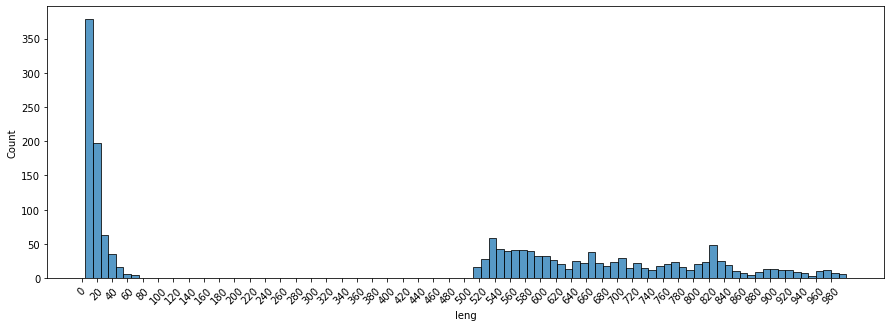

In [488]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0, 1000, 20), rotation=45)
sns.histplot(error[error['leng']<=1000]['leng'],bins=100)

#### 후기 길이가 500자가 넘는 것이 문제로 보이므로, 오류가 나는 부분을 제외하고 텍스트 전처리

In [491]:
#body 열이 전처리되기 전인 파일
df2 = pd.read_csv('./review_total_all.2.0.4.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154097 entries, 0 to 154096
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Column1  154097 non-null  int64 
 1   title    154097 non-null  object
 2   text     154097 non-null  object
 3   id       154097 non-null  object
 4   date     154097 non-null  object
 5   like     154097 non-null  int64 
 6   rate     154097 non-null  int64 
 7   place    154097 non-null  object
 8   season   154097 non-null  object
 9   cast     154097 non-null  object
 10  show     154097 non-null  object
 11  genre    154097 non-null  object
 12  body     154097 non-null  object
 13  열1       154097 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 16.5+ MB


In [492]:
errorOver500 = error[error['leng']>=500]
errorOver500 = df2.loc[errorOver500.index,:]
errorOver500.reset_index(inplace=True)

In [493]:
def cleansing(text):
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'
    text = re.sub(pattern, '', text)

    pattern = '([A-Za-z]+)'
    text = re.sub(pattern, '', text)

    pattern = '([\W])'
    text = re.sub(pattern, ' ', text)

    pattern = re.compile(r'\s+')
    text = re.sub(pattern, ' ', text)

    return text.strip()

In [494]:
from tqdm import tqdm

body = errorOver500['body'].progress_apply(lambda x : cleansing(x))

Processing Dataframe: 100%|██████████████████████████████████████████████████████| 1390/1390 [00:00<00:00, 4028.11it/s]


In [533]:
idx = errorOver500['index']

In [497]:
subLive = errorOver500['body'].progress_apply(lambda x : re.sub('라이브 후기', '', x))

Processing Dataframe: 100%|████████████████████████████████████████████████████| 1390/1390 [00:00<00:00, 174214.33it/s]


In [506]:
body = pd.DataFrame(body)

In [508]:
subLive = pd.DataFrame(subLive)

In [507]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    1390 non-null   object
dtypes: object(1)
memory usage: 11.0+ KB


In [509]:
subLive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    1390 non-null   object
dtypes: object(1)
memory usage: 11.0+ KB


In [539]:
cnt = 0
for i in idx:
    df['body'][i] = body['body'][cnt]
    df['subLive'][i] = subLive['body'][cnt]
    cnt = cnt + 1
print(cnt)

<ipython-input-539-6b89d0657eee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'][i] = body['body'][cnt]
<ipython-input-539-6b89d0657eee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subLive'][i] = subLive['body'][cnt]


1390


In [540]:
#최종 저장 데이터셋
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154097 entries, 0 to 154096
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    154097 non-null  object
 1   text     154097 non-null  object
 2   id       154097 non-null  object
 3   date     154097 non-null  object
 4   like     154097 non-null  int64 
 5   rate     154097 non-null  int64 
 6   place    154097 non-null  object
 7   season   154097 non-null  object
 8   cast     154097 non-null  object
 9   show     154097 non-null  object
 10  genre    154097 non-null  object
 11  body     154097 non-null  object
 12  leng     154097 non-null  int64 
 13  rig      154097 non-null  int64 
 14  live     154097 non-null  int64 
 15  subLive  154097 non-null  object
dtypes: int64(5), object(11)
memory usage: 18.8+ MB


#### 본문에 기호밖에 없는 후기 전처리 결과

In [541]:
df[df['body']=='[]']

,title,text,id,date,like,rate,place,season,cast,show,genre,body,leng,rig,live,subLive
564,.,...,wlsdud3***,2021-10-13,0,5,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,[],5,0,0,[]
1007,ddddfddffd,ffjkyrvdscvniyf,lhw8***,2021-09-27,0,5,LG아트센터,2021.09.07 ~2022.02.27,"조형균,박강현,시우민,최재림,강홍석,김선영,박혜나,김환희,김수하,지현준,양준모,김우...",하데스타운,뮤지컬,[],26,0,0,[]
1649,...,....,jem1***,2021-03-08,0,4,예술의전당 오페라극장,2021.01.19 ~2021.03.07,"김소현,신영숙,강필석,손준호,박민성,윤형렬,이창섭,이정열,서범석,김도형,최민철,임선...",명성황후,뮤지컬,[],8,0,0,[]
2183,-,★★★,says***,2021-02-08,0,3,예술의전당 오페라극장,2021.01.19 ~2021.03.07,"김소현,신영숙,강필석,손준호,박민성,윤형렬,이창섭,이정열,서범석,김도형,최민철,임선...",명성황후,뮤지컬,[],5,0,0,[]
4354,One Short Day,In the Emerald City ♥,ldyoun***,2021-06-10,0,5,부산 드림씨어터,2021.05.20 ~2021.06.27,"옥주현,손승연,정선아,나하나,서경수,진태화,남경주,이상준,이소유,김지선,이우승,전민...",위키드,뮤지컬,[],35,0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151972,ㅇㅇㅇㅇㅇㅇㅇㅇ,ㅇㅇㅇㅇㅇㅇㅇ,hys***,2020-10-12,0,5,드림아트센터 2관,2020.10.04 ~2021.01.24,"고훈정,양지원,이승현,김이후,홍미금,서동진,정선기",아킬레스,뮤지컬,[],16,1,0,[]
152387,bbbb,bbbbb,gkgmlwn1***,2021-03-08,0,5,충무아트센터 대극장,2021.03.24 ~2021.05.16,"류정한,조승우,윤공주,김지현,최수진,이훈진,정원영,서영주,김대종",맨오브라만차,뮤지컬,[],10,0,0,[]
152503,sdfsdf,asfdsadf,ec***,2021-03-02,0,5,충무아트센터 대극장,2021.03.24 ~2021.05.16,"류정한,조승우,윤공주,김지현,최수진,이훈진,정원영,서영주,김대종",맨오브라만차,뮤지컬,[],15,1,0,[]
153458,good,good very good,hh***,2021-02-15,0,5,충무아트센터 대극장,2021.03.24 ~2021.05.16,"류정한,조승우,윤공주,김지현,최수진,이훈진,정원영,서영주,김대종",맨오브라만차,뮤지컬,[],19,0,0,[]


In [544]:
#파일 저장
df.to_csv('./review_total_all.5.0.6.csv', index=None)